<a href="https://colab.research.google.com/github/lamyse1/GenAI/blob/main/Week3/Ex3.Visualizing_the_Self_Attention_Mechanism_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 3 Hands-on Lab: Visualizing the Self-Attention Mechanism**

In this hands-on lab, we will visualize the self-attention mechanism in Large Language Models. This will help you understand how it works.

This hands-on lab will allow you to:
1.	Implement and visualize the self-attention mechanism using Python.
2.	Understand how attention scores are calculated and applied to input data.
3.	Gain hands-on experience in a simplified environment to appreciate the role of attention in NLP models.


# **Part 1: Compute Self-Attention Scores**

**1.	Define Input Data**

Create a toy dataset representing embeddings for a sentence.

In [1]:
import numpy as np

# Example sentence: "The cat sat on the mat"
sentence = ["The", "cat", "sat", "on", "the", "mat"]

# Dummy embeddings for each word (6 words, 4-dimensional embeddings)
embeddings = np.random.rand(6, 4)
print("Word Embeddings:\n", embeddings)

Word Embeddings:
 [[2.65108468e-01 8.60880283e-01 4.32460894e-04 3.71819353e-01]
 [8.68662013e-01 5.48055066e-01 7.11292483e-01 3.82779923e-01]
 [3.79052127e-01 3.66996671e-01 4.83587093e-01 5.65338012e-01]
 [4.35911083e-01 1.77677808e-01 6.12849120e-01 8.24985764e-01]
 [4.07065865e-01 7.21599081e-01 8.02060407e-01 5.14169142e-01]
 [2.85541392e-01 4.38266141e-01 9.76509645e-01 2.87260096e-01]]


**2.	Create Query, Key, and Value Matrices**

Generate query, key, and value vectors for each word.


In [2]:
def generate_qkv(embeddings, d_k=4):
    np.random.seed(0)  # For reproducibility
    W_q = np.random.rand(d_k, d_k)  # Query weights
    W_k = np.random.rand(d_k, d_k)  # Key weights
    W_v = np.random.rand(d_k, d_k)  # Value weights
    Q = np.dot(embeddings, W_q)
    K = np.dot(embeddings, W_k)
    V = np.dot(embeddings, W_v)
    return Q, K, V

Q, K, V = generate_qkv(embeddings)
print("Query Vectors:\n", Q)
print("Key Vectors:\n", K)
print("Value Vectors:\n", V)

Query Vectors:
 [[0.72183788 1.08996083 0.56326285 0.94478803]
 [1.61180173 1.60228226 1.35375878 1.37161036]
 [1.15066088 1.21683737 0.81209918 0.83884111]
 [1.3737165  1.42511587 0.8843125  0.79198211]
 [1.59409889 1.54066227 1.23266278 1.33431079]
 [1.44658504 1.12761101 1.15742651 1.08792038]]
Key Vectors:
 [[1.04191776 1.0631705  0.70200332 1.19087337]
 [0.83778046 1.77514341 1.132104   2.15181648]
 [0.71903018 1.15277656 0.6832105  1.51076499]
 [0.685694   1.23920619 0.72731034 1.73560194]
 [1.07758185 1.64206489 0.90076846 2.07314999]
 [0.70007079 1.33199645 0.64042888 1.73538874]]
Value Vectors:
 [[0.8959427  0.93134811 0.89596145 0.79866939]
 [1.24264281 1.39945504 1.11029795 1.00237989]
 [0.9483438  1.03235891 0.80977742 0.58635303]
 [1.07799396 1.17850348 0.77697905 0.53364998]
 [1.25854886 1.37191639 1.35637101 0.85801362]
 [0.94110903 1.05210612 1.1606562  0.57102539]]


**3.	Compute Attention Scores**

Calculate attention scores using the dot product of queries and keys, followed by a softmax function.


In [3]:
def attention_scores(Q, K):
    d_k = Q.shape[1]  # Dimension of key vectors
    scores = np.dot(Q, K.T) / np.sqrt(d_k)  # Scaled dot product
    softmax_scores = np.exp(scores) / np.sum(np.exp(scores), axis=1, keepdims=True)
    return softmax_scores

attention = attention_scores(Q, K)
print("Attention Scores:\n", attention)

Attention Scores:
 [[0.10747248 0.26155452 0.11620483 0.13551153 0.23945212 0.13980452]
 [0.08391428 0.32564838 0.08545846 0.10717379 0.28770152 0.11010358]
 [0.11044715 0.26987257 0.10992809 0.12715928 0.25164501 0.13094791]
 [0.10890236 0.27817679 0.10467791 0.12128091 0.26104755 0.12591449]
 [0.08709276 0.31700073 0.08827682 0.10969104 0.28499196 0.11294669]
 [0.10319048 0.28771191 0.10115839 0.1201966  0.26605617 0.12168644]]


**4.	Apply Attention Scores to Value Vectors**

Multiply attention scores with the value vectors to compute the final outputs.


In [4]:
def attention_output(attention, V):
    return np.dot(attention, V)

output = attention_output(attention, V)
print("Self-Attention Output:\n", output)

Self-Attention Output:
 [[1.11052426 1.22139146 1.07313521 0.77374986]
 [1.14212959 1.25895523 1.1072472  0.81046903]
 [1.11557988 1.22688917 1.07972222 0.78173023]
 [1.12029575 1.23232787 1.08565072 0.78779828]
 [1.13888331 1.25496362 1.10435634 0.80663389]
 [1.12484494 1.2378639  1.08931366 0.79203502]]


# **Part 2: Visualize Attention**

1.	**Create a Heatmap of Attention Scores**

Use matplotlib to visualize the attention scores between words.


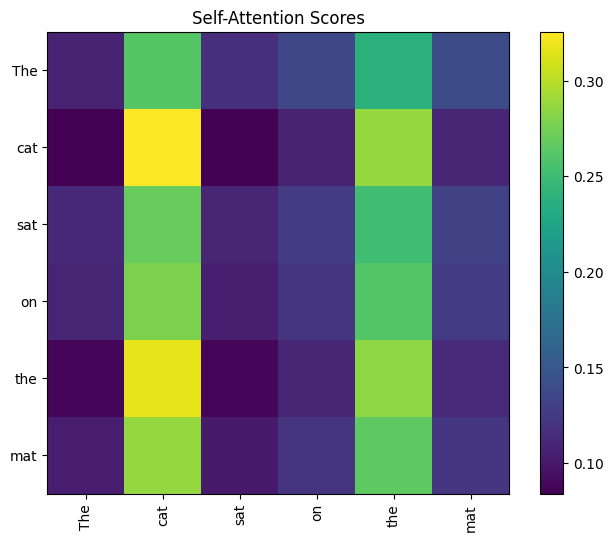

In [5]:
import matplotlib.pyplot as plt

def plot_attention(sentence, attention):
    plt.figure(figsize=(8, 6))
    plt.imshow(attention, cmap='viridis')
    plt.colorbar()
    plt.xticks(ticks=range(len(sentence)), labels=sentence, rotation=90)
    plt.yticks(ticks=range(len(sentence)), labels=sentence)
    plt.title("Self-Attention Scores")
    plt.show()

plot_attention(sentence, attention)

# **Part 3: Experimentation**

1.	**Change Sentence Length and Dimensions**

Modify the sentence and embeddings variables to explore how attention adapts to different inputs.

2.	**Analyze Different Weight Matrices**

Experiment with different random weights for query, key, and value matrices to observe changes in attention scores.

3.	**Add Masking**

Implement masking to ignore certain positions (e.g., padding tokens) in the sequence.


<ipython-input-6-e214fc9f83dd>:6: RuntimeWarning: overflow encountered in exp
  softmax_scores = np.exp(scores) / np.sum(np.exp(scores), axis=1, keepdims=True)
<ipython-input-6-e214fc9f83dd>:6: RuntimeWarning: invalid value encountered in divide
  softmax_scores = np.exp(scores) / np.sum(np.exp(scores), axis=1, keepdims=True)


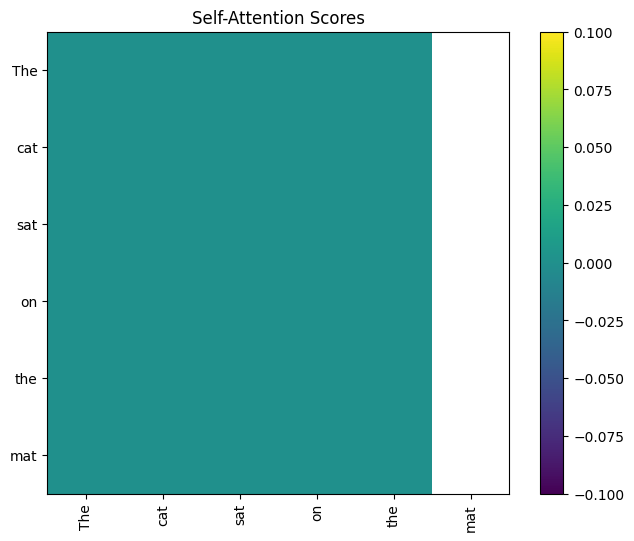

In [6]:
def masked_attention_scores(Q, K, mask=None):
    d_k = Q.shape[1]
    scores = np.dot(Q, K.T) / np.sqrt(d_k)
    if mask is not None:
        scores += (mask * -1e9)  # Add large negative value to masked positions
    softmax_scores = np.exp(scores) / np.sum(np.exp(scores), axis=1, keepdims=True)
    return softmax_scores

# Example mask: ignore the last word
mask = np.array([[0, 0, 0, 0, 0, -1]])
masked_attention = masked_attention_scores(Q, K, mask)
plot_attention(sentence, masked_attention)

# **Bonus Part 4: Try the Bertviz library to visualize attention scores in a real model**

In this part, we will experiment with the Bertviz library.
BertViz is an interactive tool for visualizing attention in Transformer language models such as BERT, GPT2, or T5. It can be run inside a Jupyter or Colab notebook through a simple Python API that supports most Huggingface models.

In [7]:
#install the library
!pip install bertviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 113.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.6/139.6 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

First load a Huggingface model, either a pre-trained model as shown below, or your own fine-tuned model. Be sure to set output_attentions=True.

In [8]:
from transformers import AutoTokenizer, AutoModel, utils
utils.logging.set_verbosity_error()  # Suppress standard warnings
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased", output_attentions=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Then prepare inputs and compute attention:

In [9]:
inputs = tokenizer.encode("The cat sat on the mat", return_tensors='pt')
outputs = model(inputs)
attention = outputs[-1]  # Output includes attention weights when output_attentions=True
tokens = tokenizer.convert_ids_to_tokens(inputs[0])

Finally, display the attention weights using the [head_view](https://github.com/jessevig/bertviz/blob/master/bertviz/head_view.py) or [model_view](https://github.com/jessevig/bertviz/blob/master/bertviz/model_view.py) functions:

In [10]:
from bertviz import head_view
#The head view visualizes attention for one or more attention heads in the same layer
head_view(attention, tokens)

<IPython.core.display.Javascript object>

In [11]:
from bertviz import model_view
#The model view shows a bird's-eye view of attention across all layers and heads.
model_view(attention, tokens)

<IPython.core.display.Javascript object>